Data Description: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [ ]:
import pandas as pd 
from pandas import DataFrame
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import roc_auc_score

## Data Cleaning & Preparation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hotel Cancelation Prediction without data standardization.csv to Hotel Cancelation Prediction without data standardization.csv


In [ ]:
df=pd.read_csv('Hotel Cancelation Prediction without data standardization.csv')

In [ ]:
print(df.shape)
print(df.columns.values)
print(df.head(10))

(119390, 19)
['is_canceled' 'lead_time' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'is_repeated_guest' 'previous_cancellations'
 'origin_Portugal' 'reserved_standard_room' 'made_booking_changes'
 'made_special_requests' 'come_alone' 'with_chilren' 'no_deposit'
 'travel_agents/tour_operators_distributed' 'direct_distributed'
 'online_purchased' 'arrival_peak_season' 'arrival_middle_season'
 'city_hotel']
   is_canceled  lead_time  ...  arrival_middle_season  city_hotel
0            0        342  ...                      0           0
1            0        737  ...                      0           0
2            0          7  ...                      0           0
3            0         13  ...                      0           0
4            0         14  ...                      0           0
5            0         14  ...                      0           0
6            0          0  ...                      0           0
7            0          9  ...                      0     

In [ ]:
print(df.isnull().sum())

is_canceled                                 0
lead_time                                   0
stays_in_weekend_nights                     0
stays_in_week_nights                        0
is_repeated_guest                           0
previous_cancellations                      0
origin_Portugal                             0
reserved_standard_room                      0
made_booking_changes                        0
made_special_requests                       0
come_alone                                  0
with_chilren                                0
no_deposit                                  0
travel_agents/tour_operators_distributed    0
direct_distributed                          0
online_purchased                            0
arrival_peak_season                         0
arrival_middle_season                       0
city_hotel                                  0
dtype: int64


In [ ]:
df_clean = df.copy()

In [ ]:
# make sure the data type
cvar_list = ['is_canceled', 'is_repeated_guest', 'previous_cancellations', 'origin_Portugal', 'reserved_standard_room', 'made_booking_changes', 'made_special_requests', 'come_alone', 'with_chilren', 'no_deposit', 'travel_agents/tour_operators_distributed', 'direct_distributed', 'online_purchased', 'city_hotel', 'arrival_middle_season', 'arrival_peak_season']
nvar_list = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']
df_clean[cvar_list] = df_clean[cvar_list].astype('category')
df_clean[nvar_list] = df_clean[nvar_list].astype('float64')

In [ ]:
print(df_clean.isnull().sum())

is_canceled                                 0
lead_time                                   0
stays_in_weekend_nights                     0
stays_in_week_nights                        0
is_repeated_guest                           0
previous_cancellations                      0
origin_Portugal                             0
reserved_standard_room                      0
made_booking_changes                        0
made_special_requests                       0
come_alone                                  0
with_chilren                                0
no_deposit                                  0
travel_agents/tour_operators_distributed    0
direct_distributed                          0
online_purchased                            0
arrival_peak_season                         0
arrival_middle_season                       0
city_hotel                                  0
dtype: int64


In [ ]:
print(df_clean.shape)

(119390, 19)


# 2. Export dataset for Classification Tree 
#     (without Data Standardization)
#     file name: Hotel Cancelation Prediction without data standardization.csv

In [ ]:
# df_clean.to_csv('Hotel Cancelation Prediction without data standardization.csv')

# 3. Data Partition

In [ ]:
# split data into test_part and nontest_part
df_sample1 = df_clean.copy()
df4partition = df_sample1
testpart_size = 0.2
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)
print(df_nontestData)

      is_canceled  lead_time  ...  arrival_middle_season  city_hotel
31386           0      156.0  ...                      0           0
1789            0       84.0  ...                      1           0
685             1       87.0  ...                      0           0
77349           1      190.0  ...                      1           1
7814            1        8.0  ...                      0           0
...           ...        ...  ...                    ...         ...
50057           1      142.0  ...                      1           1
98047           0       74.0  ...                      1           1
5192            1       50.0  ...                      1           0
77708           0        0.0  ...                      1           1
98539           0      120.0  ...                      1           1

[95512 rows x 19 columns]


In [ ]:
# define the dependant varialbe adn independant variables
DV = 'is_canceled'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

In [ ]:
# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

In [ ]:
# Depth level of the Classification Tree
kfolds = 5
maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth':list(range(minimum_depth, maximum_depth+1))}

In [ ]:
# find the model that best fit
gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.602656 to fit



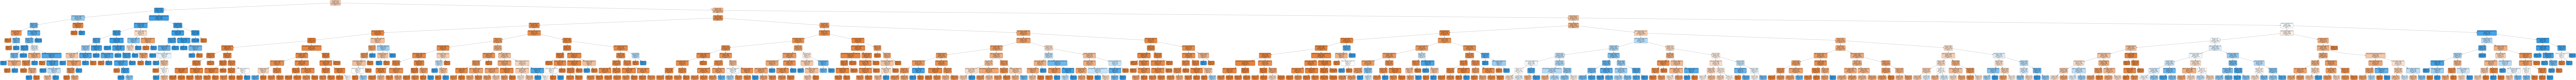

In [ ]:
Image(summary_tree(clf_BPT))

In [ ]:
# Tthe level of depth of the best pruned tree
print(clf_BPT.get_depth())

10


In [ ]:
y_test_actual = df_testData[DV]

X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

0.8959226024016617


In [ ]:
def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['with_chilren <= 0.5', 'previous_cancellations <= 0.5', 'reserved_standard_room <= 0.5', 'is_canceled <= 21.0', 'direct_distributed <= 0.5']
sample = 27
value = [27, 0]
class =  0

Leaf node ID = 2
Path = ['with_chilren <= 0.5', 'previous_cancellations <= 0.5', 'reserved_standard_room <= 0.5', 'is_canceled <= 21.0', 'direct_distributed > 0.5', 'is_canceled <= 0.5']
sample = 1
value = [1, 0]
class =  0

Leaf node ID = 3
Path = ['with_chilren <= 0.5', 'previous_cancellations <= 0.5', 'reserved_standard_room <= 0.5', 'is_canceled <= 21.0', 'direct_distributed > 0.5', 'is_canceled > 0.5']
sample = 4
value = [0, 4]
class =  1

Leaf node ID = 4
Path = ['with_chilren <= 0.5', 'previous_cancellations <= 0.5', 'reserved_standard_room <= 0.5', 'is_canceled > 21.0', 'is_repeated_guest <= 0.5', 'is_canceled <= 155.5', 'is_canceled <= 56.0', 'is_canceled <= 26.0']
sample = 9
value = [0, 9]
class =  1

Leaf node ID = 5
Path = ['with_chilren <= 0.5', 'previous_cancellations 